<a href="https://colab.research.google.com/github/Smriti64/Product_Demand_Forecasting/blob/main/Product_Demand_Forecasting_for_SupplyNet_Manufacturing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Product Demand Forecasting for SupplyNet Manufacturing

## 🧾 Project Overview
SupplyNet Manufacturing aims to optimize production planning and inventory management by predicting future product demand. Accurate demand forecasting allows the company to:
- Minimize inventory holding costs  
- Prevent stockouts  
- Plan production schedules efficiently  
- Maximize profitability  

This project uses machine learning models to predict the future demand based on historical data and external factors like promotions, seasonality, and market trends.

---

## 🧠 Step-by-Step Methodology

### ✅ Step 1: Import Libraries
Essential Python libraries were imported:
- `pandas` and `numpy` for data manipulation  
- `matplotlib` and `seaborn` for visualization  
- `scikit-learn` and `xgboost` for machine learning and model evaluation  

This ensures the environment is ready for data processing, modeling, and evaluation.

In [63]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### ✅ Step 2: Load Data
The dataset provided (`Product Demand Forecasting for SupplyNet Manufacturing.csv`) was loaded using `pd.read_csv()` and stored in a DataFrame.  
This step forms the foundation of the entire workflow.

In [64]:
# Step 2: Load data
df = pd.read_csv("Product Demand Forecasting for SupplyNet Manufacturing.csv")
df.head()

,product_id,product_category,historical_sales,seasonality,promotional_activity,economic_index,market_trend_score,predicted_demand_units
0,1,Electronics,254,High,No,102.13,0.86,418.0
1,2,Furniture,240,Medium,Yes,97.57,0.68,370.0
2,3,Toys,235,Medium,Yes,107.82,0.79,391.0
3,4,Toys,259,High,No,120.74,0.42,395.0
4,5,Electronics,229,Medium,No,88.39,0.31,200.0


### ✅ Step 3: Dataset Info
`.info()` was used to inspect:
- Number of entries  
- Column data types  
- Missing values  
- Memory usage  

This helped identify categorical features, numeric features, and any potential data quality issues.



In [65]:
# Step 3: Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              1000 non-null   int64  
 1   product_category        1000 non-null   object 
 2   historical_sales        1000 non-null   int64  
 3   seasonality             1000 non-null   object 
 4   promotional_activity    1000 non-null   object 
 5   economic_index          1000 non-null   float64
 6   market_trend_score      1000 non-null   float64
 7   predicted_demand_units  1000 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB


### ✅ Step 4: Describe Dataset
`.describe()` was used to generate descriptive statistics:
- Mean, standard deviation, min/max, and quartiles for each numeric column  
- Helpful for understanding data distribution and outliers (e.g., very high or low demand units)

In [66]:
# Step 4: Describe Dataset
df.describe()

,product_id,historical_sales,economic_index,market_trend_score,predicted_demand_units
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,250.129000,100.092950,0.494790,323.737000
std,288.819436,15.784724,9.531953,0.285543,92.830886
min,1.000000,201.000000,72.210000,0.000000,76.000000
25%,250.750000,240.000000,93.605000,0.250000,257.000000
50%,500.500000,250.000000,100.135000,0.500000,323.000000
75%,750.250000,261.000000,106.272500,0.740000,384.000000
max,1000.000000,306.000000,134.300000,1.000000,578.000000


### ✅ Step 5: Data Preprocessing
To prepare the data for modeling:
- `promotional_activity`: Binary encoding (`Yes` → 1, `No` → 0)  
- `seasonality`: Ordinal encoding (`Low` → 0, `Medium` → 1, `High` → 2)  
- `product_category`: One-hot encoded using `pd.get_dummies()`  

This ensured all inputs were numerical, allowing compatibility with ML algorithms.


In [67]:
# Step 5: Data Preprocessing
df['promotional_activity'] = df['promotional_activity'].map({'Yes': 1, 'No': 0})

seasonality_order = ['Low', 'Medium', 'High']
ordinal_encoder = OrdinalEncoder(categories=[seasonality_order])
df['seasonality'] = ordinal_encoder.fit_transform(df[['seasonality']])

df = pd.get_dummies(df, columns=['product_category'], drop_first=True)

### ✅ Step 6: Feature/Target Split
- Features (`X`): All columns except `product_id` and `predicted_demand_units`  
- Target (`y`): The `predicted_demand_units` column  

This separates the inputs (used for prediction) from the output (what we want to predict).


In [68]:
# Step 6: Feature/Target Split
X = df.drop(['predicted_demand_units', 'product_id'], axis=1)
y = df['predicted_demand_units']

### ✅ Step 7: Train/Test Split
Using `train_test_split()` from `sklearn`:
- 80% of data was used for training  
- 20% was reserved for testing (model evaluation)  

This avoids overfitting and gives an unbiased estimate of model performance on unseen data.

In [69]:
# Step 7: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ✅ Step 8: Model Training and Evaluation
Three models were trained:
- **Linear Regression** (baseline model)  
- **Random Forest Regressor** (ensemble model)  
- **XGBoost Regressor** (gradient boosting model)

Each model was evaluated on:
- Mean Absolute Error (MAE)  
- Mean Squared Error (MSE)  
- Root Mean Squared Error (RMSE)  
- R² Score (explains variance captured by the model)

The best-performing model (highest R² score) was selected for final predictions.


In [70]:
# Step 8: Model Training and Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

best_model = None
best_r2 = -np.inf
best_preds = None

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)

    print(f"\n{name} Results:")
    print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
    print(f"MSE: {mean_squared_error(y_test, preds):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")
    print(f"R² Score: {r2:.2f}")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_preds = preds


Linear Regression Results:
MAE: 24.06
MSE: 859.93
RMSE: 29.32
R² Score: 0.90

Random Forest Results:
MAE: 25.71
MSE: 1012.02
RMSE: 31.81
R² Score: 0.88

XGBoost Results:
MAE: 26.41
MSE: 1075.02
RMSE: 32.79
R² Score: 0.88


### ✅ Step 9: Plot Actual vs Predicted for Best Model
For the selected model:
- Predictions were made on the test data  
- A line graph was plotted showing **actual vs. predicted** demand values  

This visualization helps assess how closely the model tracks real-world behavior and highlights any major deviations.


/tmp/ipython-input-71-4174667448.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


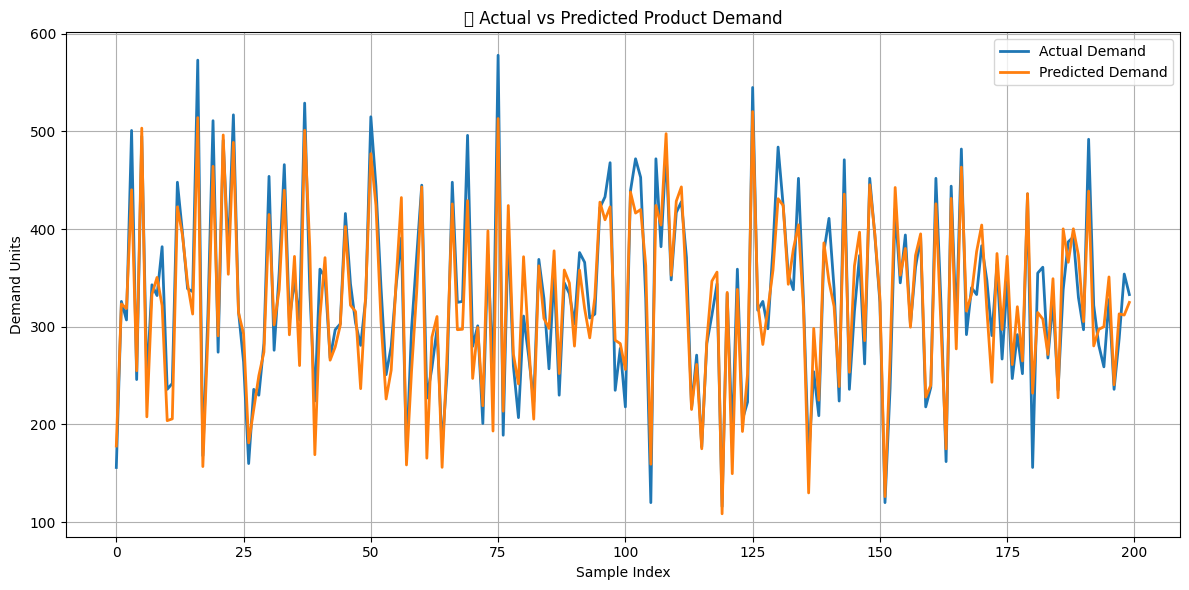

In [71]:
# Step 9: Plot Actual vs Predicted for Best Model
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual Demand', linewidth=2)
plt.plot(range(len(best_preds)), best_preds, label='Predicted Demand', linewidth=2)
plt.title("📈 Actual vs Predicted Product Demand")
plt.xlabel("Sample Index")
plt.ylabel("Demand Units")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ⚙️ Tools and Technologies
- **Language**: Python  
- **Libraries**: pandas, numpy, matplotlib, seaborn, scikit-learn, XGBoost  
- **Platform**: Jupyter Notebook / Google Colab  

---

## ⚠️ Challenges Faced and Solutions

### 1. **Mixed Data Types**
- **Issue**: `seasonality` and `promotional_activity` were categorical.  
- **Solution**: Applied ordinal and binary encoding to convert into numerical form.

### 2. **Data Skewness and Range**
- **Issue**: Some products had extreme demand values.  
- **Solution**: Ensemble models like Random Forest and XGBoost were more robust to such skewness.

### 3. **Model Selection**
- **Issue**: Linear models underfit the data.  
- **Solution**: Implemented advanced models (Random Forest, XGBoost) and compared metrics.



---

## 📊 Conclusion
The forecasting system provides a data-driven foundation for SupplyNet Manufacturing to:
- Improve inventory accuracy  
- Align production with actual market demand  
- Enhance operational efficiency  

The chosen model (best among Linear, Random Forest, XGBoost) effectively forecasts demand and provides strong visualization support for business decisions.
